In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
total = pd.read_csv('131project.csv')
total = total.rename(columns = {'suicides/100k pop':'suicide_rate'})
total = total.rename(columns = {'gdp_per_capita ($)':'gdpc'})
total = total.rename(columns = {' gdp_for_year ($) ':'gdp'})
HDIdata = pd.read_csv('HDI.csv')
HDIdata = HDIdata.melt('Country')
HDIdata.rename(columns = {'variable':'year', 'value':'HDI'}, inplace=True)
HDIdata['year'] = HDIdata.year.astype(int)
HDIdata['Country'] = HDIdata['Country'].str[1:]
HDIdata.head()
total = total.drop(columns='HDI for year')
total = pd.merge(total, HDIdata,  how='left', left_on=['country', 'year'], right_on = ['Country', 'year'])
total = total.drop(columns='Country')
total.rename(columns = {'HDI_y':'HDI'}, inplace=True)
total.head()
total.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [69]:
middleeastcountry=['Cyprus','Israel','Bahrain','Oman','Qatar']
northeuropecountry=['Iceland', 'Finland','Denmark','Norway','Sweden']
#bothcountry=['Turkey','Israel','United Arab Emirates','Oman','Kuwait','Iceland', 'Finland','Denmark','Norway','Sweden']
middleeast=total[total.country.isin(middleeastcountry)]
#middleeast['area']='middleeast'
northeurope=total[total.country.isin(northeuropecountry)]
#northeurope['area']='northeurope'
#both=total[total.country.isin(bothcountry)]

middleeast.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
2636,Bahrain,1985,male,25-34 years,7,67600,10.36,Bahrain1985,3651861702,9980,Boomers,NaN
2637,Bahrain,1985,male,35-54 years,3,49700,6.04,Bahrain1985,3651861702,9980,Silent,NaN
2638,Bahrain,1985,female,35-54 years,1,26900,3.72,Bahrain1985,3651861702,9980,Silent,NaN
2639,Bahrain,1985,female,15-24 years,0,37800,0.00,Bahrain1985,3651861702,9980,Generation X,NaN
2640,Bahrain,1985,female,25-34 years,0,27600,0.00,Bahrain1985,3651861702,9980,Boomers,NaN


In [45]:
northeurope.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
7418,Denmark,1994,male,75+ years,89,131700,67.58,Denmark1994,156162311732,32034,G.I. Generation,0.824
7419,Denmark,1994,male,55-74 years,189,448200,42.17,Denmark1994,156162311732,32034,Silent,0.824
7420,Denmark,1994,male,35-54 years,279,755600,36.92,Denmark1994,156162311732,32034,Boomers,0.824
7421,Denmark,1994,female,75+ years,70,230600,30.36,Denmark1994,156162311732,32034,G.I. Generation,0.824
7422,Denmark,1994,male,25-34 years,85,414100,20.53,Denmark1994,156162311732,32034,Boomers,0.824


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f024e0>,
      dtype=object)

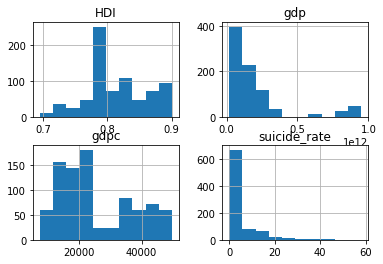

In [51]:
middleeast[['gdp','gdpc','suicide_rate','HDI']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fead668>,
      dtype=object)

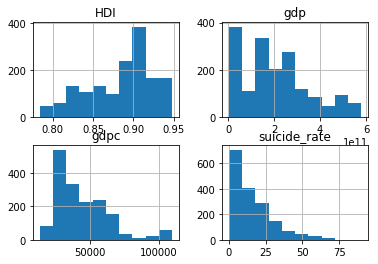

In [53]:
northeurope[['gdp','gdpc','suicide_rate','HDI']].hist()

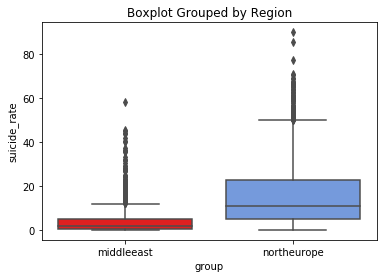

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


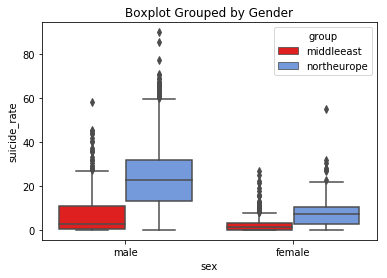

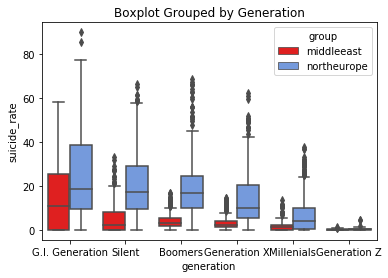

In [56]:
#two areas
box_area = sns.boxplot(data = both,
                x = 'group',
                y = 'suicide_rate',
                palette = palette)

box_area.set_title('Boxplot Grouped by Region') #
plt.show()

# by gender
middleeast['group']=['middleeast']*864
northeurope['group']=['northeurope']*1712
both = pd.concat([middleeast, northeurope])
palette=["red", "cornflowerblue"]
box_gender = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'sex',
                y = 'suicide_rate',
                palette = palette
                        )

box_gender.set_title('Boxplot Grouped by Gender') # You can change the title here
plt.show()

# by generation
box_generation = sns.boxplot(data = both,
                hue = 'group', # different colors for different 'cls'
                x = 'generation',
                y = 'suicide_rate',
                palette = palette)

box_generation.set_title('Boxplot Grouped by Generation') #
plt.show()


# Scatter plot for middle east

,gdpc,suicide_rate
gdpc,1.00000,-0.30887
suicide_rate,-0.30887,1.00000


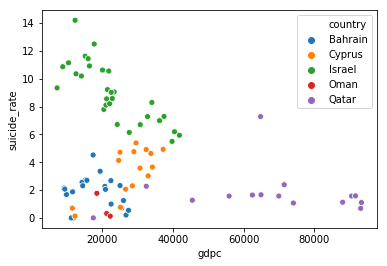

In [70]:
gdp_plot = middleeast.groupby([middleeast.country, middleeast.year]).gdpc.mean()
suicide_rate_plot = middleeast.groupby([middleeast.country, middleeast.year]).suicide_rate.mean()

joint = pd.DataFrame(gdp_plot).join(pd.DataFrame(suicide_rate_plot))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset = joint.reset_index()

sns.scatterplot(joint_reset.gdpc, joint_reset.suicide_rate, hue = joint_reset.country)
joint.corr()

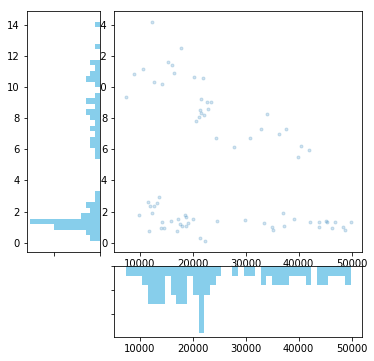

In [65]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset.gdpc, joint_reset.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()


,gdpc,suicide_rate
gdpc,1.000000,-0.493508
suicide_rate,-0.493508,1.000000


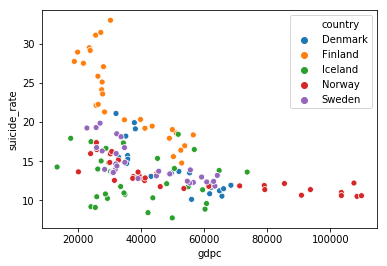

In [58]:
gdp_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).gdpc.mean()
suicide_rate_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).suicide_rate.mean()

joint2 = pd.DataFrame(gdp_plot2).join(pd.DataFrame(suicide_rate_plot2))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset2 = joint2.reset_index()

sns.scatterplot(joint_reset2.gdpc, joint_reset2.suicide_rate, hue = joint_reset2.country)
joint2.corr()

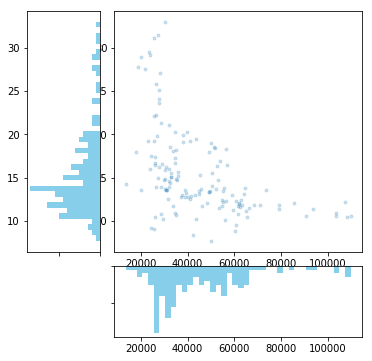

In [64]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4)   ## 4 x 4 grid
main_ax = fig.add_subplot(grid[:-1, 1:]) # vertically, we start at the beginning, and leave one space


# horizontally, we start at the second and go to the end
y_hist = fig.add_subplot(grid[:-1, 0 ], xticklabels=[], sharey=main_ax) # share y axis with main, no ticks on x
x_hist = fig.add_subplot(grid[ -1, 1:], yticklabels=[], sharex=main_ax) # share x axis with main, no ticks on y

# scatter points on the main axes
main_ax.plot(joint_reset2.gdpc, joint_reset2.suicide_rate, 'o', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(joint_reset2.gdpc, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
x_hist.invert_yaxis()

y_hist.hist(joint_reset2.suicide_rate, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')
y_hist.invert_xaxis()
